## The Ramsey model

This file deals with the Ramsey model. It draws the phase diagram and solves for the initial state of consumption. 

3.6092470063405626


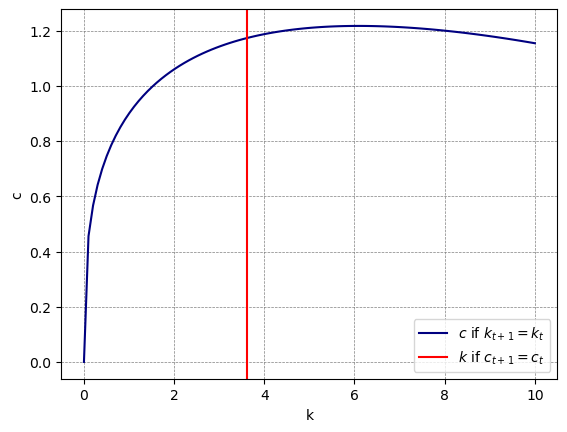

In [9]:
import numpy as np
import matplotlib.pyplot as plt

## Production function
def f(k,α):
    out = k**α
    return out

## Derivative of prod fctn
def fp(k,α):
    out = α * k**(α-1)
    return out

## Utility function
def u(c,σ):
    out = c**(1-σ)-1/(1-σ)
    return out

## Draw the equilibrium levels of consumption and capital into a phase diagram
α = 1/3
σ = 1.0001
δ = 0.1
β = 0.96

kmax = 10
knum = 100

## Laws of motion
# u'(c_t) = β ( 1+r_t+1-δ ) u'(c_t+1)
# k_t+1 = (1-δ)k_t + f(k_t) - c_t 

## k if c is constant
# 1 = β ( 1+f'(k)-δ ) -->
k_star = ((1/β-1+ δ)/α)**(1/(α-1))
print(k_star)

## c if k is constant
#c =  f(k)-δk 
kvec = np.linspace(0,kmax,knum)
c_star = f(kvec,α) - δ*kvec
c_starstar = f(k_star,α) - δ*k_star

plt.plot(kvec, c_star, label=r'$c$ if $k_{t+1}=k_t$', color = 'navy')
plt.axvline(x=k_star, label = r'$k$ if $c_{t+1}=c_t$', color = 'red')
plt.xlabel('k')
plt.ylabel('c')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend()





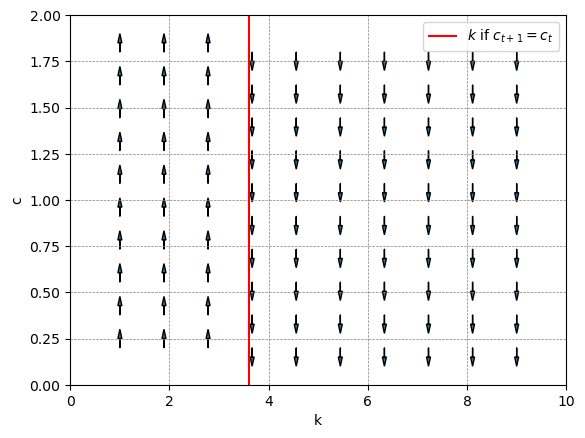

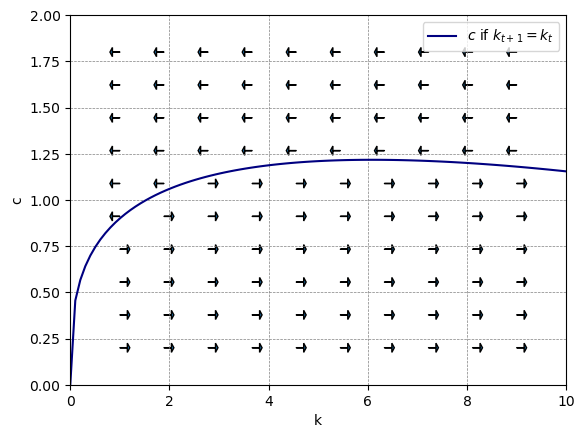

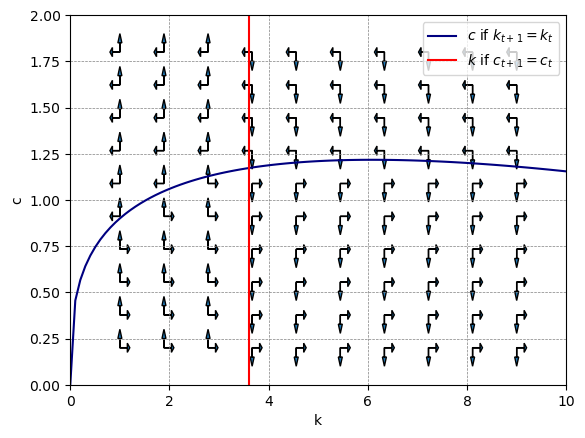

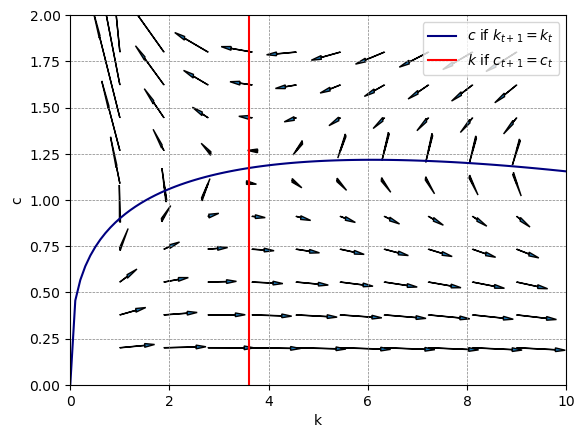

In [4]:
## Draw the phase diagram in stages

def phase_diagram(kpoints,cpoints):

    ## Initialize result vector
    resk = np.zeros((kpoints.size,cpoints.size))
    resc = np.zeros((kpoints.size,cpoints.size))
    
    for ik in range(kpoints.size):
        for ic in range(cpoints.size):
            kk = kpoints[ik]
            cc = cpoints[ic]
            
            k1 = (1-δ)*kk + f(kk,α) - cc
            c1 = ( cc**(-σ) / (β*(1+fp(k1,α)-δ)) ) ** (-1/σ)

            resk[ik,ic] = k1
            resc[ik,ic] = c1
    return resk, resc

npoints = 10
kpoints = np.linspace(1,9,npoints)
cpoints = np.linspace(0.2,1.8,npoints)

pk,pc = phase_diagram(kpoints,cpoints)



## Dynamics of consumption -- simplfied
plt.axvline(x=k_star, label = r'$k$ if $c_{t+1}=c_t$', color = 'red')
plt.ylim(0,2)
plt.xlim(0,10)
plt.xlabel('k')
plt.ylabel('c')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend()
for ik in range(npoints):
    for ic in range(npoints):
        plt.arrow(kpoints[ik], cpoints[ic], 0, ((kpoints[ik]-k_star)>0)*-.1, length_includes_head=True,
                     head_width=0.08, head_length=0.05)

        plt.arrow(kpoints[ik], cpoints[ic], 0, ((kpoints[ik]-k_star)<0)*.1, length_includes_head=True,
                     head_width=0.08, head_length=0.05)
plt.savefig('c_dynamics.pdf')        
plt.show()

## Dynamics of capital -- simplfied
plt.plot(kvec, c_star, label=r'$c$ if $k_{t+1}=k_t$', color = 'navy')
plt.ylim(0,2)
plt.xlim(0,10)
plt.xlabel('k')
plt.ylabel('c')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend()
for ik in range(npoints):
    for ic in range(npoints):
        c_line = f(kpoints[ik],α) - δ*kpoints[ik]

        plt.arrow(kpoints[ik], cpoints[ic], ((cpoints[ic]-c_line)>0)*-.2,0, length_includes_head=True,
                     head_width=0.05, head_length=0.05)

        plt.arrow(kpoints[ik], cpoints[ic], ((cpoints[ic]-c_line)<0)*.2,0, length_includes_head=True,
                     head_width=0.05, head_length=0.05)
plt.savefig('k_dynamics.pdf')        
plt.show()

## Dynamics of c and k -- simplified
plt.plot(kvec, c_star, label=r'$c$ if $k_{t+1}=k_t$', color = 'navy')
plt.axvline(x=k_star, label = r'$k$ if $c_{t+1}=c_t$', color = 'red')
plt.ylim(0,2)
plt.xlim(0,10)
plt.xlabel('k')
plt.ylabel('c')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend()
for ik in range(npoints):
    for ic in range(npoints):
        c_line = f(kpoints[ik],α) - δ*kpoints[ik]

        plt.arrow(kpoints[ik], cpoints[ic], ((cpoints[ic]-c_line)>0)*-.2,0, length_includes_head=True,
                     head_width=0.05, head_length=0.05)

        plt.arrow(kpoints[ik], cpoints[ic], ((cpoints[ic]-c_line)<0)*.2,0, length_includes_head=True,
                     head_width=0.05, head_length=0.05)

        plt.arrow(kpoints[ik], cpoints[ic], 0, ((kpoints[ik]-k_star)>0)*-.1, length_includes_head=True,
                     head_width=0.08, head_length=0.05)

        plt.arrow(kpoints[ik], cpoints[ic], 0, ((kpoints[ik]-k_star)<0)*.1, length_includes_head=True,
                     head_width=0.08, head_length=0.05)
plt.savefig('ck_dynamics1.pdf')        
plt.show()


## Dynamics of c and k -- true derivatives
plt.plot(kvec, c_star, label=r'$c$ if $k_{t+1}=k_t$', color = 'navy')
plt.axvline(x=k_star, label = r'$k$ if $c_{t+1}=c_t$', color = 'red')
plt.ylim(0,2)
plt.xlim(0,10)
plt.xlabel('k')
plt.ylabel('c')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend()
for ik in range(npoints):
    for ic in range(npoints):
        c_line = f(kpoints[ik],α) - δ*kpoints[ik]

        plt.arrow(kpoints[ik], cpoints[ic], (pk[ik,ic] - kpoints[ik]), (pc[ik,ic] - cpoints[ic]), length_includes_head=True,
          head_width=0.02, head_length=0.2)

plt.savefig('ck_dynamics.pdf')        
plt.show()

        


0.6044732441485393


C:\Users\qwp970\AppData\Local\Temp\ipykernel_512\3485312643.py:11: RuntimeWarning: invalid value encountered in scalar power
  out = α * k**(α-1)
C:\Users\qwp970\AppData\Local\Temp\ipykernel_512\3485312643.py:6: RuntimeWarning: invalid value encountered in scalar power
  out = k**α


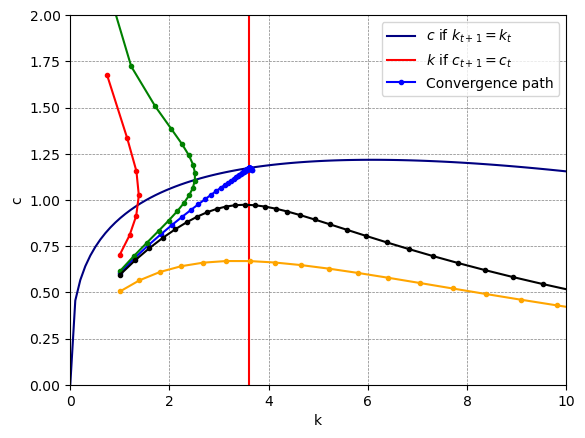

C:\Users\qwp970\AppData\Local\Temp\ipykernel_512\3485312643.py:11: RuntimeWarning: invalid value encountered in scalar power
  out = α * k**(α-1)
C:\Users\qwp970\AppData\Local\Temp\ipykernel_512\3485312643.py:6: RuntimeWarning: invalid value encountered in scalar power
  out = k**α


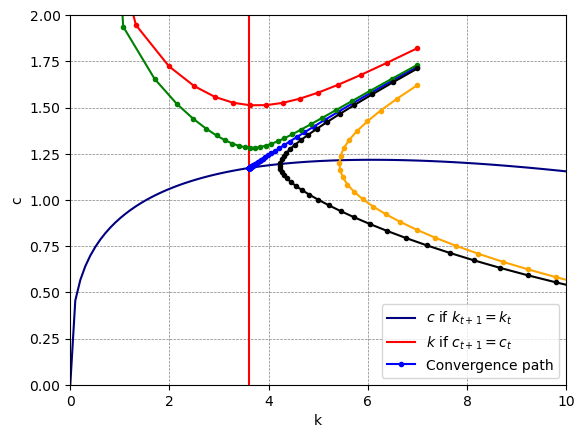

In [25]:
## Plot the model's transition to the steady state by finding c0

## Function that models the transition -- for given k0 and c0, this file simulates forward
def transition(k0,c0,δ,num,maxk,maxc):
    cvec = np.zeros(num)
    kvec = np.zeros(num)
    
    cvec[0] = c0
    kvec[0] = k0
    for i in range(num-1):
        kk = kvec[i]
        cc = cvec[i]
        kvec[i+1] = (1-δ)*kk + f(kk,α) - cc

        cvec[i+1] = ( cc**(-σ) / (β*(1+fp(kvec[i+1],α)-δ)) ) ** (-1/σ)
        if kvec[i+1]>maxk:
            break
        if cvec[i+1]>maxc:
            break
    ## Drop points outside the allowed area
    cvec = cvec[cvec>0]
    kvec = kvec[kvec>0]
    return cvec, kvec

## This file performs a bisection algorithm to find c0, given k0 (https://en.wikipedia.org/wiki/Bisection_method)
def bisection(k0,kstar,cstar,δ,tol):

    cond = 10
    ## Initial guess
    if k0 < kstar:
        clow = 0
        chigh = f(k0,α) - δ*k0
    else:
        clow = f(k0,α) - δ*k0
        chigh  = f(k0,α) - δ*k0 + k0
   
    ## Bisection code
    while np.sqrt((clow-chigh)**2)>tol:
        cguess = (clow+chigh)/2
        cc = cguess
        kk = k0
        #print(np.sqrt((clow-chigh)**2))
        freason = interation_bisection(kk,cc,cstar,kstar,k0,δ,tol)
        if freason == 1:
            print('solved')
            return cguess
        if freason == 2:
            chigh = cguess    #update chigh
            
        if freason == 3:
            clow = cguess     #update clow
            
    return cguess

def interation_bisection(kk,cc,cstar,kstar,k0,δ,tol):
    cond = 10
    cguess = cc
    while cond>tol:
        ## Iterate forwards once

        k1 = (1-δ)*kk + f(kk,α) - cc
        c1 = ( cc**(-σ) / (β*(1+fp(k1,α)-δ)) ) ** (-1/σ)
        
        #The optimal c given the new value for k
        ckstar = f(k1,α) - δ*k1
        ## Test optimality
        cond = np.sqrt((cstar-c1 )**2 + (kstar-k1)**2)
        #print(cond)

        ## if k0<kstar, c0 must always be below steady state
        if k0 < kstar:
            if ((c1 < ckstar) & (k1<kstar)):
                ## Update the values
                cc = c1
                kk = k1
                freason = 1
                continue
            elif  ((c1 > ckstar) & (k1<kstar)):
                ## We're exploding to the top left --> initial guess too high
                freason = 2 #update chigh
                break
            elif  ((c1 < ckstar) & (k1>kstar)):
                ## We're exploding to the bottom right --> initial guess too low
                freason = 3 #update clow
                break
        ## if k0>kstar, c0 must always be above steady state
        if k0 > kstar:
            if ((c1 > ckstar) & (k1>kstar)):
                ## Update the values
                cc = c1
                kk = k1
                freason = 1 #no fail
                continue
            elif  ((c1 < ckstar) & (k1>kstar)):
                ## We're exploding to the bottom right --> initial guess too low
                freason = 3 #update clow
                break
            elif  ((c1 > ckstar) & (k1<kstar)):
                ## We're exploding to the top left --> initial guess too high
                freason = 2 #update chigh
                break 
    
    return freason

## Convergence from the bottom left
k0start = 1
asdf = bisection(k0start,k_star,c_starstar,δ,10**-10)
print(asdf)
plt.plot(kvec, c_star, label=r'$c$ if $k_{t+1}=k_t$', color = 'navy')
plt.axvline(x=k_star, label = r'$k$ if $c_{t+1}=c_t$', color = 'red')
plt.xlabel('k')
plt.ylabel('c')
plt.ylim(0,2)
plt.xlim(0,10)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

ctrans,ktrans = transition(k0start, asdf,δ,100,10,10)
plt.plot(ktrans,ctrans, color = 'blue', marker = '.', label ='Convergence path')

ctrans,ktrans = transition(k0start, asdf+.1,δ,100,10,10)
plt.plot(ktrans,ctrans, color = 'red', marker = '.')

ctrans,ktrans = transition(k0start, asdf+0.01,δ,100,10,10)
plt.plot(ktrans,ctrans, color = 'green', marker = '.')

ctrans,ktrans = transition(k0start, asdf-0.1,δ,100,10,10)
plt.plot(ktrans,ctrans, color = 'orange', marker = '.')

ctrans,ktrans = transition(k0start, asdf-0.01,δ,100,10,10)
plt.plot(ktrans,ctrans, color = 'black', marker = '.')
plt.legend()
plt.savefig('convergence_bl.pdf')        
plt.show()

## Convergence from the top right
k0start = 7
asdf = bisection(k0start,k_star,c_starstar,δ,10**-10)

plt.plot(kvec, c_star, label=r'$c$ if $k_{t+1}=k_t$', color = 'navy')
plt.axvline(x=k_star, label = r'$k$ if $c_{t+1}=c_t$', color = 'red')
plt.xlabel('k')
plt.ylabel('c')
plt.ylim(0,2)
plt.xlim(0,10)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

ctrans,ktrans = transition(k0start, asdf,δ,100,10,10)
plt.plot(ktrans,ctrans, color = 'blue', marker = '.', label ='Convergence path')

ctrans,ktrans = transition(k0start, asdf+.1,δ,100,10,10)
plt.plot(ktrans,ctrans, color = 'red', marker = '.')

ctrans,ktrans = transition(k0start, asdf+0.01,δ,100,10,10)
plt.plot(ktrans,ctrans, color = 'green', marker = '.')

ctrans,ktrans = transition(k0start, asdf-0.1,δ,100,10,10)
plt.plot(ktrans,ctrans, color = 'orange', marker = '.')

ctrans,ktrans = transition(k0start, asdf-0.01,δ,100,10,10)
plt.plot(ktrans,ctrans, color = 'black', marker = '.')
plt.legend()
plt.savefig('convergence_tr.pdf')        
plt.show()

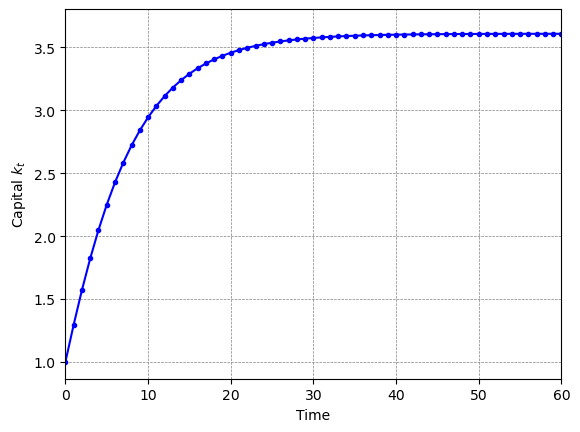

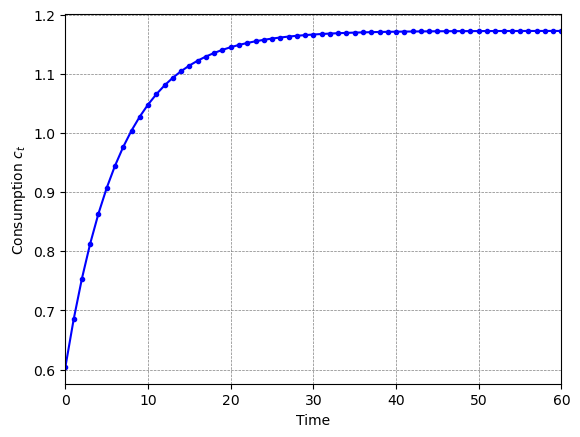

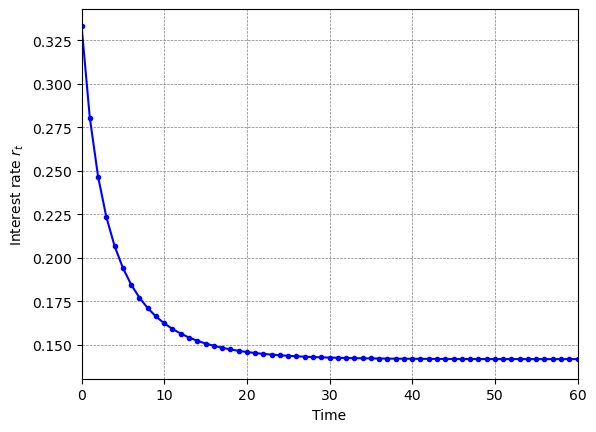

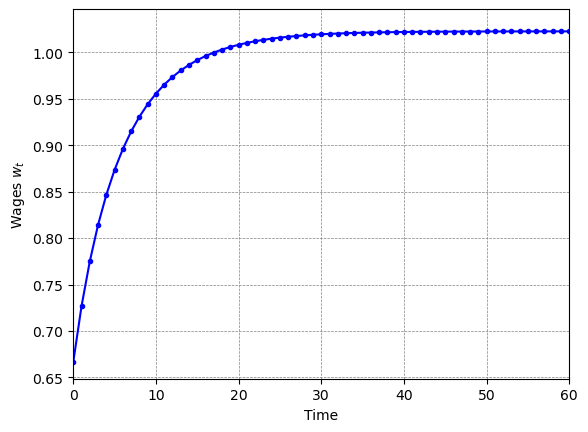

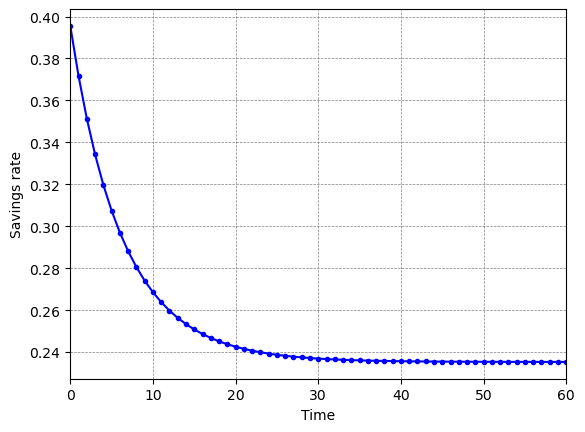

In [26]:
## Other variables along the transition path
k0start = 1
asdf = bisection(k0start,k_star,c_starstar,δ,10**-10)
ctrans,ktrans = transition(k0start, asdf,δ,100,10,10)

plt.plot(ktrans , color = 'blue', marker = '.')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.xlim(0,60)
plt.xlabel('Time')
plt.ylabel(r'Capital $k_t$')
plt.savefig('trans_k.pdf')        
plt.show()

plt.plot(ctrans , color = 'blue', marker = '.')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.xlim(0,60)
plt.xlabel('Time')
plt.ylabel(r'Consumption $c_t$')
plt.savefig('trans_c.pdf')        
plt.show()

plt.plot(α * ktrans**(α-1) , color = 'blue', marker = '.')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.xlim(0,60)
plt.xlabel('Time')
plt.ylabel(r'Interest rate $r_t$')
plt.savefig('trans_r.pdf')        
plt.show()

plt.plot((1-α) * ktrans**(α) , color = 'blue', marker = '.')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.xlim(0,60)
plt.xlabel('Time')
plt.ylabel(r'Wages $w_t$')
plt.savefig('trans_w.pdf')        
plt.show()

plt.plot(1-ctrans/ ktrans**(α) , color = 'blue', marker = '.')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.xlim(0,60)
plt.xlabel('Time')
plt.ylabel(r'Savings rate')
plt.savefig('trans_s.pdf')        
plt.show()



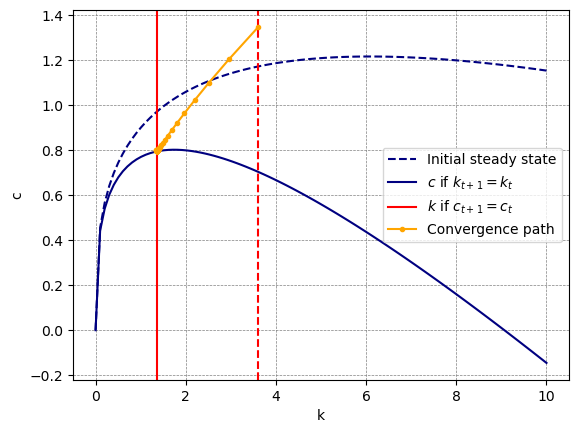

In [38]:
## Higher depreciation

# Initial figure
plt.plot(kvec, c_star, label=r'Initial steady state', color = 'navy', linestyle = 'dashed')
plt.axvline(x=k_star,  color = 'red', linestyle = 'dashed')
plt.xlabel('k')
plt.ylabel('c')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

# New Delta
δ_new = δ +0.13
k_star1 = ((1/β-1+ δ_new)/α)**(1/(α-1))
kvec1 = np.linspace(0,kmax,knum)
c_star1 = f(kvec,α) - δ_new*kvec
c_starstar1 = f(k_star1,α) - δ_new*k_star1

plt.plot(kvec, c_star1, label=r'$c$ if $k_{t+1}=k_t$', color = 'navy')
plt.axvline(x=k_star1, label = r'$k$ if $c_{t+1}=c_t$', color = 'red')

k0start = k_star
asdf1 = bisection(k0start,k_star1,c_starstar1,δ_new,10**-15)
ctrans,ktrans = transition(k0start, asdf1,δ_new,100,10,10)
plt.plot(ktrans,ctrans, color = 'orange', marker = '.', label ='Convergence path')
plt.legend()
plt.savefig('new_delta.pdf')        
plt.show()